# Pymaceuticals Inc.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy
import numpy as np 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_result_comp= pd.merge(study_results, mouse_metadata, how="left",on=["Mouse ID", "Mouse ID"])

study_result_complete=study_result_comp.sort_index(0)

# Display the data table for preview
study_result_complete.head()

C:\Users\romej\AppData\Local\Temp\ipykernel_20780\1279829769.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  study_result_complete=study_result_comp.sort_index(0)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
total_mice= len(mouse_metadata)
total_mice


249

In [4]:
len(study_result_complete)

1893

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

s=study_result_complete.loc[study_result_complete[['Mouse ID','Timepoint']].duplicated(),:]

s1=s['Mouse ID'].unique()

s1


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
study_result_dup= study_result_complete.loc[ study_result_complete['Mouse ID'] == s1[0],:]

study_result_dup


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

study_result_complete.drop_duplicates(subset= ('Mouse ID','Timepoint'), inplace= True,keep= False)



study_result_complete.head()

len(study_result_complete)


1883

In [8]:
# Checking the number of mice in the clean DataFrame.


study_result_complete.groupby('Mouse ID')['Mouse ID'].count()


Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

# Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen= study_result_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median_regimen= study_result_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

var_regimen= study_result_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdev_regimen= study_result_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

sem_regimen= study_result_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics=pd.DataFrame({'Mean Tumor Volume':mean_regimen,
                                 'Median Tumor Volume':median_regimen,
                                 'Tumor Volume Variance':var_regimen,
                                 'Tumor Volume Std. Dev.':stdev_regimen,
                                 'Tumor Volume Std. Err.': sem_regimen})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line



summary_statistics1= pd.DataFrame(study_result_complete.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']))



summary_statistics1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='#of Observed Mouce Timepoints'>

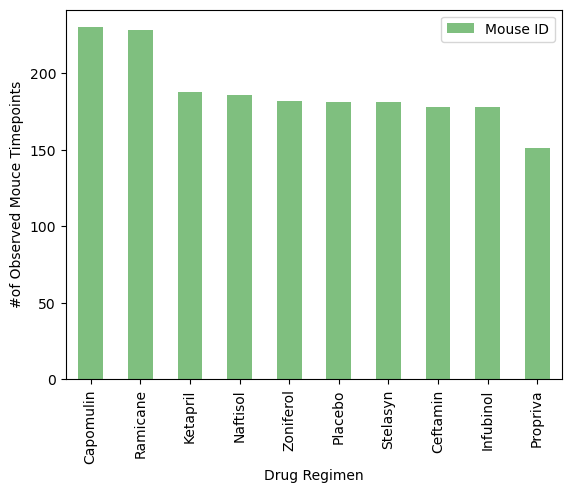

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mice_per_regimen1=study_result_complete.set_index('Drug Regimen')

mice_per_re = mice_per_regimen1.groupby('Drug Regimen')[["Mouse ID"]].count()
                            

mice_per_regimen=mice_per_re.sort_values('Mouse ID', ascending= False)


mice_per_regimen_plot = mice_per_regimen.plot.bar(color='g',alpha=0.5,align = 'center')
mice_per_regimen_plot.set_xlabel("Drug Regimen")
mice_per_regimen_plot.set_ylabel("#of Observed Mouce Timepoints")
mice_per_regimen_plot


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


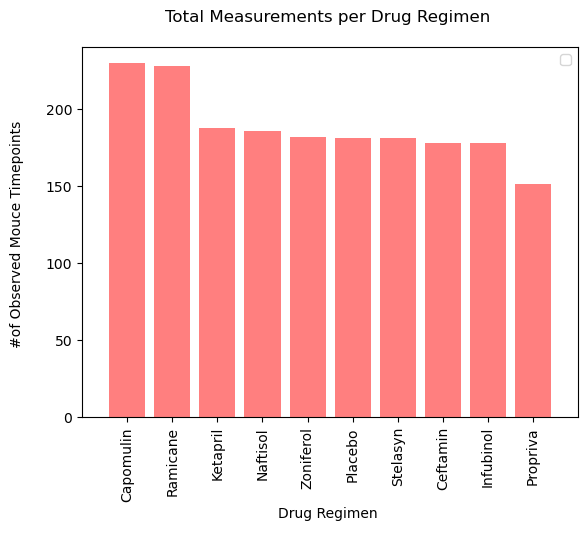

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# prepare x axis and y_axis
x_axis = np.arange(len(mice_per_regimen ))
y_axis = mice_per_regimen['Mouse ID'] 

l=mice_per_regimen['Mouse ID'].max()
# create ticks 

x= mice_per_regimen.index.values

tick_location = [value for value in x_axis]

plt.xticks(tick_location, x,rotation="vertical") 


# creatte the plot
plt.bar(x_axis,y_axis, color='r', alpha=0.5,align = 'center')



# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0,l+10)

#Title 
plt.title("Total Measurements per Drug Regimen \n")
#labels
plt.xlabel('Drug Regimen \n')
plt.ylabel('#of Observed Mouce Timepoints \n')

plt.legend(loc='upper right', frameon=True)

Text(0, 0.5, 'Sex')

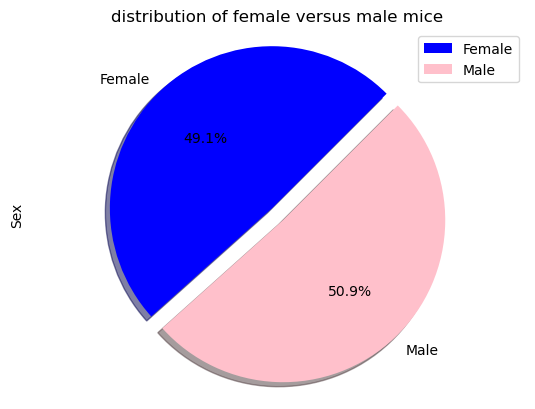

In [13]:

# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group mice by gender
mouse_gender = study_result_complete.groupby(["Sex"]).count()


# Create a pie chart

mouse_pie = mouse_gender.plot(kind='pie', y='Mouse ID', title=('distribution of female versus male mice'),
                            colors = ['blue','pink'],autopct = "%.1f%%", shadow = True,startangle=45,explode = (0.1,0))

#Add legend
mouse_pie.legend(loc='upper right', frameon=True)

plt.axis("equal")
plt.ylabel('Sex')

Text(0, 0.5, 'Sex')

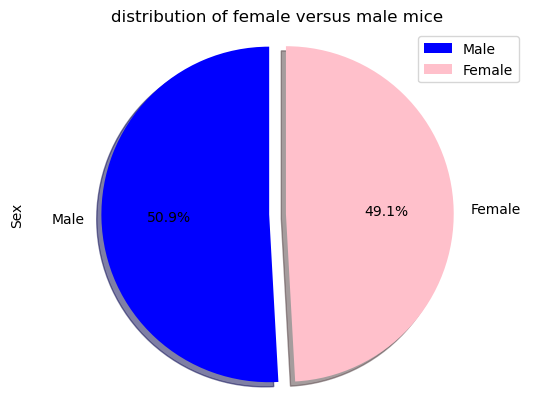

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender = study_result_complete["Sex"].value_counts()


explode = (0.1,0)

colors =["blue", "pink"]

labels = mouse_gender.index

#create a pie chart 
plt.pie(mouse_gender, explode=explode, labels=labels, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=90) 

plt.title("distribution of female versus male mice")
plt.legend(labels, loc='upper right')
plt.axis("equal")
plt.ylabel('Sex')







In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# last timepoint for each mouse
max_tp=study_result_complete.groupby(['Mouse ID'])['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_result_complete_mtp= pd.merge(max_tp , study_result_complete, on=(["Mouse ID","Timepoint"]))

study_result_complete_mtp


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

 
    # Locate the rows which contain mice on each drug and get the tumor volumes

for i in treatments:
    drugs = study_result_complete_mtp.loc[study_result_complete_mtp['Drug Regimen'] == i]
     #add subset
    tumor_v_d= drugs['Tumor Volume (mm3)']
    #concat the new drug list to the previous one
    tumor_vol_data.append(tumor_v_d)

# Determine outliers using upper and lower bounds
    
#step1: Determine quartiles 

quartile_Capomulin = tumor_vol_data[0].quantile([.25,.5,.75])

quartile_Ramicane = tumor_vol_data[1].quantile([.25,.5,.75])

quartile_Infubinol = tumor_vol_data[2].quantile([.25,.5,.75])

quartile_Ceftamin= tumor_vol_data[3].quantile([.25,.5,.75])

# step2: Determine lower and upper quartiles 

lowerq_Capomulin = quartile_Capomulin[0.25]
upperq_Capomulin = quartile_Capomulin[0.75]

lowerq_Ramicane = quartile_Ramicane[0.25]
upperq_Ramicane = quartile_Ramicane[0.75]

lowerq_Infubinol = quartile_Infubinol[0.25]
upperq_Infubinol = quartile_Infubinol[0.75]

lowerq_Ceftamin = quartile_Ceftamin[0.25]
upperq_Ceftamin = quartile_Ceftamin[0.75]

# step3: Calculate IQRs. 

IQR_Capomulin = upperq_Capomulin-lowerq_Capomulin

IQR_Ramicane = upperq_Ramicane-lowerq_Ramicane

IQR_Infubinol = upperq_Infubinol-lowerq_Infubinol

IQR_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin
   
#step3: Determine outliers using upper and lower bounds

lower_bound_Capomulin= lowerq_Capomulin - (1.5*IQR_Capomulin)
upper_bound_Capomulin = upperq_Capomulin + (1.5*IQR_Capomulin)

lower_bound_Ramicane = lowerq_Ramicane - (1.5*IQR_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*IQR_Ramicane)

lower_bound_Infubinol = lowerq_Infubinol- (1.5*IQR_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*IQR_Infubinol)

lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*IQR_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*IQR_Ceftamin)

# Display outliers
#t1=pd.DataFrame(tumor_vol_data)
#out=t1.loc[t1['Tumor Volume (mm3)']<lower_bound_Capomulin]

print('Capomulin: All the values less than',lower_bound_Capomulin, 'and more than', upper_bound_Capomulin,'are considered outliers' )  
print('Ramicane: All the values less than',lower_bound_Ramicane, 'and more than', upper_bound_Ramicane,'are considered outliers' )  
print('Infubinol: All the values less than',lower_bound_Infubinol, 'and more than', upper_bound_Infubinol,'are considered outliers' )  
print('Ceftamin: All the values less than',lower_bound_Ceftamin, 'and more than', upper_bound_Ceftamin,'are considered outliers' )  


Capomulin: All the values less than 20.70456164999999 and more than 51.83201549 are considered outliers
Ramicane: All the values less than 17.912664470000003 and more than 54.30681135 are considered outliers
Infubinol: All the values less than 36.83290494999999 and more than 82.74144559000001 are considered outliers
Ceftamin: All the values less than 25.355449580000002 and more than 87.66645829999999 are considered outliers


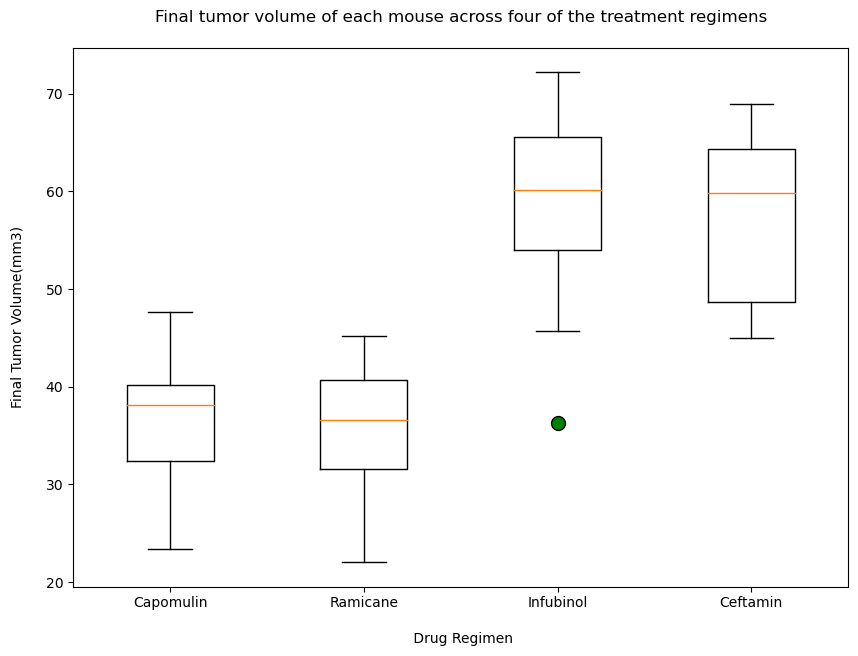

In [17]:
# Generate a box plot 
 
fig,ax = plt.subplots(figsize =(10, 7))
prop = dict(markerfacecolor='green', markersize=10)
ax.boxplot(tumor_vol_data,labels = treatments,flierprops=prop)
ax.set_title('Final tumor volume of each mouse across four of the treatment regimens\n')
ax.set_ylabel('Final Tumor Volume(mm3)\n')
ax.set_xlabel('\n Drug Regimen')
plt.show()


# Line and Scatter Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


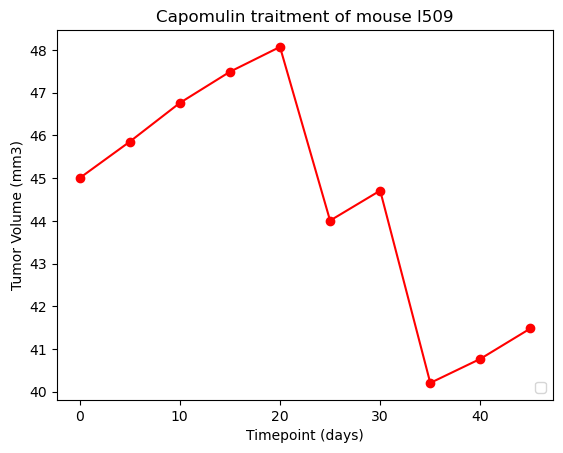

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_table = study_result_complete.loc[study_result_complete['Drug Regimen'] == 'Capomulin']
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
x_axix =mousedata['Timepoint']
y_axis = mousedata['Tumor Volume (mm3)']


plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'],color='r', label='', marker = 'o')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.legend(loc='lower right')

plt.title( 'Capomulin traitment of mouse l509')

plt.show()


C:\Users\romej\AppData\Local\Temp\ipykernel_20780\2325306202.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mice_group =capomulin_table.groupby(['Mouse ID']).mean()


Text(0, 0.5, ' Average Tumor volume (mm3)')

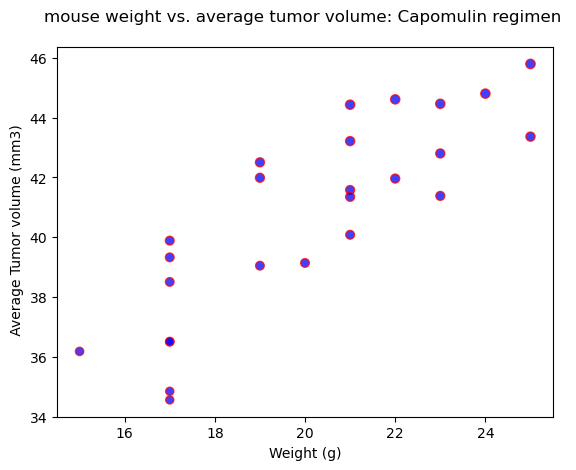

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_table = study_result_complete.loc[study_result_complete['Drug Regimen'] == "Capomulin"]


mice_group =capomulin_table.groupby(['Mouse ID']).mean()

av_tum =mice_group ['Tumor Volume (mm3)']

mouse_weight = mice_group['Weight (g)']

 #Create scatte rplot 
plt.scatter(mouse_weight, av_tum, marker='o', facecolors='blue', edgecolors='red',
              s=av_tum, alpha=0.75)
#title and labels 
plt.title( 'mouse weight vs. average tumor volume: Capomulin regimen \n')
plt.xlabel('Weight (g)')
plt.ylabel(' Average Tumor volume (mm3)')

# Correlation and Regression

Text(0.5, 1.0, 'mouse weight vs. average tumor volume: Capomulin regimen \n')

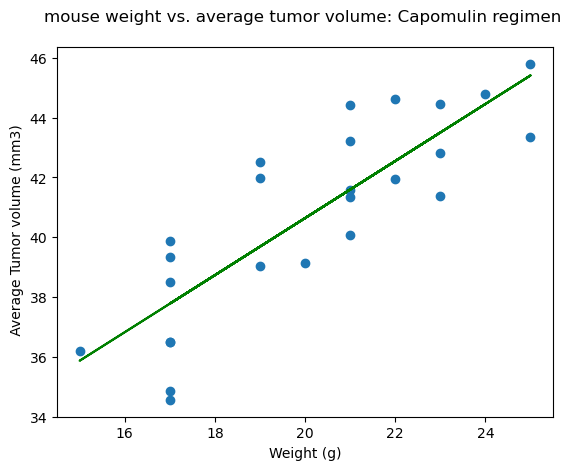

In [20]:

# Equations for correlation and regression
y_value=av_tum
x_value=mouse_weight
(slope, intercept, rvalue, pvalue,stderr)=scipy.stats.linregress (x_value, y_value)

regress_values= x_value*slope+intercept

line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
#Create scatter plot 
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,'green')

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color='red')

plt.xlabel('Weight (g)')
plt.ylabel(' Average Tumor volume (mm3)')

plt.title( 'mouse weight vs. average tumor volume: Capomulin regimen \n')


